In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
food_app = pd.read_csv('https://downloader.disk.yandex.ru/disk/b10ea873e25f96ca0321bc7c97cafe01718b7e761cf6c0dc71a8946154eca146/6176a137/fKqInKw3d7bLFOeFnMGnhPJJza0jjWg1M3cN_2Mdm41Q97Gp27L068GOTFv5enLKq61aV_HPM2DJPY9gccIhHDkgBv_4OzxzA760iIU-Hxmr8npumZHI4midPdWhecNq?uid=0&filename=5_task_1.csv&disposition=attachment&hash=wZZYozTSb5EspzkjFyWED0wmOgwXVLFoQoj%2BKh%2BMOYHrgRfZGr9bPJpNW%2BElhjYdq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=318312&hid=734ddc340aff5570860a5ca0d964d2d8&media_type=spreadsheet&tknv=v2')

In [3]:
food_app.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
food_app.isnull().sum()

id        0
group     0
events    0
dtype: int64

**So, the first task: you need to check which format of photographs of dishes is the best, i.e. in which group, on average, did they buy the most.    
In total, users were shown three options:**

* A - rectangular 16x9
* B - square
* C - rectangular 12x4

I will use ANOVA statistical test to compare the means in this case.

**Check if the variances within the groups are approximately the same (homogeneous) using the Leuven test.**

In [5]:
A_group = food_app.query('group == "A"').events
B_group = food_app.query('group == "B"').events
C_group = food_app.query('group == "C"').events

In [6]:
scipy.stats.levene(A_group, B_group, C_group)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [7]:
# p-value > 0.05, do not reject the null hypothesis (the variances within the groups are the same)

**Also verify that the data is normally-distributed by applying the Shapiro-Wilk test. Before applying the criterion be sure to sample (1000 observations), since incorrect results may be obtained on large samples.**

In [8]:
A_sample = A_group.sample(1000, random_state=17)
B_sample = B_group.sample(1000, random_state=17)
C_sample = C_group.sample(1000, random_state=17)

In [9]:
scipy.stats.shapiro(A_sample)

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [10]:
scipy.stats.shapiro(B_sample)

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [11]:
scipy.stats.shapiro(C_sample)

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [12]:
# events distribution in all experiment groups is normal

**It's time to apply test**

For comparing averages, I use one-factor dispersion analysis (f_oneway). The statistic value is 2886, and the p-level of significance is 0. It means that there is a difference between experiment groups.

In [13]:
scipy.stats.f_oneway(A_group, B_group, C_group)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

**Now use the Tukey test and determine which groups are statistically significant differences.**

In [14]:
print(pairwise_tukeyhsd(endog=food_app.events, groups=food_app.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [15]:
# all groups differ statistically significant

**Conclusion:** we need to use square pictures (group B) in the food app.

In [16]:
food_exp2 = pd.read_csv('https://downloader.disk.yandex.ru/disk/2563382ddbd32ce7e486c7450ddad43cdb508d371c6e9316897eb60a7308bc3b/6176b1b0/fKqInKw3d7bLFOeFnMGnhB0VIk1SDOBSnMjqejnqwYikztiec2H8OT6AObAQkb0Uhagkv1uNFhZrghreGXNMHg3_nYs8A2t5sTOQfaVvAaar8npumZHI4midPdWhecNq?uid=0&filename=5_task_2.csv&disposition=attachment&hash=eyZLtOMBJaoWSDs2guGBw6/mRG2PHgUtpiKTWZ70JEyn4OfwqBKC3pOrhdTaVQiuq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=2158728&hid=6854a1d0aa4f29946853fd25df900415&media_type=spreadsheet&tknv=v2')

In [17]:
food_exp2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [18]:
food_exp2.isnull().sum()

id         0
group      0
segment    0
events     0
dtype: int64

**In the second experiment, we need to test how users respond to a change in the checkout button format, by customer segment.**

I will use multivariate analysis of variance (MANOVA).

**Let's look at the data. First, visualize the distribution of events for the control and test groups.**

In [19]:
control = food_exp2.query('group == "control"')
test = food_exp2.query('group == "test"')

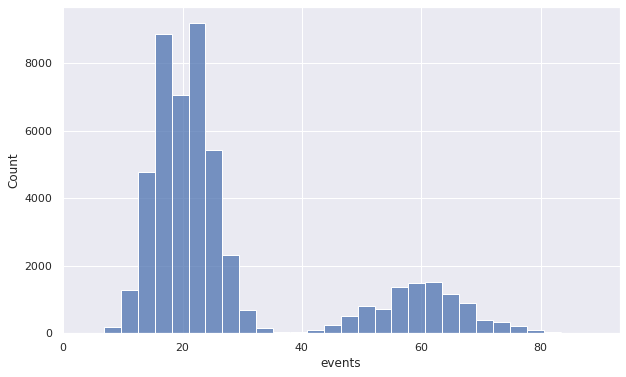

In [31]:
sns.histplot(control.events, bins=30)
sns.set(rc={'figure.figsize': (10, 6)})

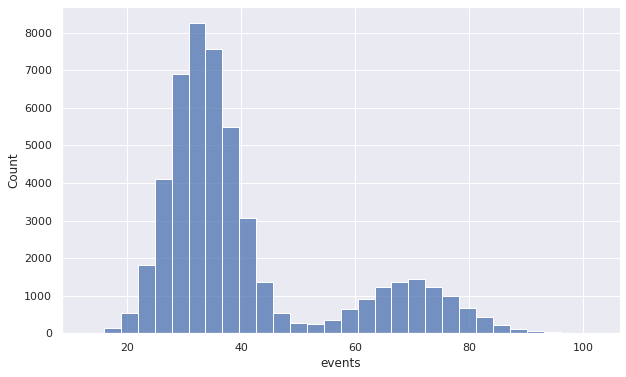

In [21]:
sns.histplot(test.events, bins=30)
sns.set(rc={'figure.figsize': (10, 6)})

**Calculate the mean, median and standard deviation of events by group and by user segment.**    

In [22]:
food_exp2.groupby(['group', 'segment']).events.agg({'mean', 'median', 'std'}).round(2)

std   mean  median
group   segment                     
control high     7.81  59.97    60.0
        low      4.47  20.03    20.0
test    high     8.40  69.94    70.0
        low      5.72  33.03    33.0

**It remains to choose a formula for the model.     
We want to test the effect of several variables - group and segment - on events, with interaction of factors.**

I use this formula:    
events ~ segment + group + segment:group

**Conduct a test and then use Tukey's test to understand which groups are statistically significant differences.**    
**In this case, for subsequent comparisons between groups, you can do the following: combine the group and segment columns in combination, so that you can then pass them to the groups argument in MultiComparison**    

In [23]:
formula = 'events ~ segment + group + segment:group'
model = ols(formula, food_exp2).fit()
aov_table = anova_lm(model, typ=2)

In [24]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [25]:
# segment, group and segment:group interaction are statistically significant

In [26]:
food_exp2["group_segment"] = food_exp2.group + '/' + food_exp2.segment

In [27]:
food_exp2.head()

,id,group,segment,events,group_segment
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [28]:
print(pairwise_tukeyhsd(endog=food_exp2.events, groups=food_exp2.group_segment))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


For both segments, events indicators were statistically significant increased in comparison with the control group.     
The difference between the value of the test group of the low segment and the control group of the same segment is approximately 13.    
The difference between control / high and test / high is about 10.

**Visualize the results.**

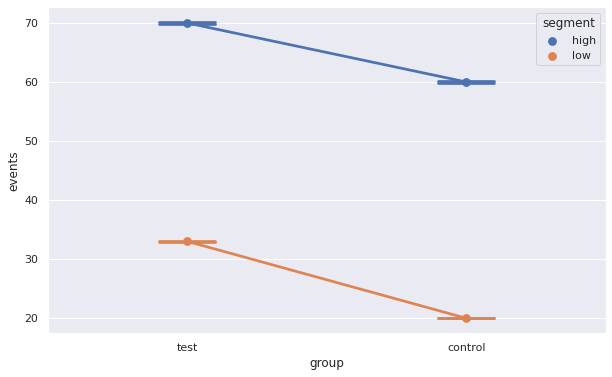

In [29]:
sns.pointplot(x='group', y='events', hue='segment', data=food_exp2, capsize = .2)

In [30]:
# average events increased for all groups, so new version of button is better